## Importing Relevant Packages

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Importing Data downloaded from website https://www.townlands.ie/

In [2]:
#import dataset
IrishData = pd.read_csv('townlands.csv')
IrishData.head()

C:\Users\vabio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,WKT,OSM_ID,NAME_TAG,NAME_GA,NAME_EN,ALT_NAME,ALT_NAME_G,OSM_USER,OSM_TIMEST,ATTRIBUTIO,LOGAINM_RE,CO_NAME,CO_OSM_ID,CO_LOGAINM,CP_NAME,CP_OSM_ID,CP_LOGAINM,ED_NAME,ED_OSM_ID,ED_LOGAINM,BAR_NAME,BAR_OSM_ID,BAR_LOGAIN,T_IE_URL,AREA,LATITUDE,LONGITUDE,EPOCH_TSTM
0,"POLYGON ((-10.4079325 51.8779163,-10.4076294 5...",-6419252,Long Island,NaN,Long Island,NaN,NaN,Boggedy,2016-07-17 15:35:17+02,NaN,22386,Kerry,-332622.0,100005.0,Killemlagh,-6280381.0,1095,NaN,NaN,NaN,Iveragh,-5304835.0,88,http://www.townlands.ie/kerry/iveragh/killemla...,4.133401e+04,51.879500,-10.403492,1.468763e+09
1,"POLYGON ((-10.3232512 52.2142272,-10.32316 52....",-6205326,Ballybrack,An Baile Breac,NaN,NaN,NaN,Stephen_Co_Antrim,2016-05-11 22:35:00+02,NaN,NaN,Kerry,-332622.0,100005.0,Kilquane,-6267057.0,1104,Kilquann,-6342994.0,NaN,Corkaguiny,-5304974.0,91,http://www.townlands.ie/kerry/corkaguiny/kilqu...,4.968431e+06,52.218589,-10.283522,1.462999e+09
2,"POLYGON ((-10.4004688 52.1666577,-10.4002001 5...",-6196255,Castlequarter,CeathrÃº an ChaisleÃ¡in,NaN,NaN,NaN,Stephen_Co_Antrim,2016-05-07 18:36:24+02,NaN,NaN,Kerry,-332622.0,100005.0,Marhin,-6266901.0,1113,Marhin,-6341710.0,NaN,Corkaguiny,-5304974.0,91,http://www.townlands.ie/kerry/corkaguiny/marhi...,6.981506e+05,52.169369,-10.393195,1.462639e+09
3,"POLYGON ((-8.9654536 53.1591993,-8.9649708 53....",-3375719,Cruckeen Island,NaN,Cruckeen Island,NaN,NaN,Boggedy,2013-12-13 09:44:33+01,NaN,19296,Galway,-335444.0,100015.0,Kinvarradoorus,-4814709.0,1031,Doorus,-5652280.0,NaN,Kiltartan,-6011213.0,70,http://www.townlands.ie/galway/kiltartan/kinva...,5.242723e+03,53.159570,-8.964700,1.386924e+09
4,"POLYGON ((-10.1640547 53.4435293,-10.1640547 5...",-3368152,Inishdugga,Inis Duga,Inishdugga,NaN,NaN,Boggedy,2013-12-08 22:22:43+01,http://places.galwaylibrary.ie/asp/fullresult....,18194,Galway,-335444.0,100015.0,Ballindoon,-3344392.0,910,Doonloughan,-4114820.0,NaN,Ballynahinch,-4131109.0,79,http://www.townlands.ie/galway/ballynahinch/ba...,1.948037e+05,53.444070,-10.157734,1.386538e+09


### Data Description

OSM_ID: Integer. The id of the object in the OSM database. If it's positive, it's a way; if it's negative, it's a relation. (Consult the OSM data model for more information). IDs are not shared across objects (e.g. there will never be an ED and a townland with the same OSM_ID).

NAME: String. The name of the object. Should be the "common name". Almost certainly in English, but may be in Irish. (NB: In the KML/KMZ file, this is NAME2 due to how ogr2ogr converts things. Suggestions welcome for how to fix this.)

NAME_GA: String. The name of the object in Irish.

NAME_EN: String. The name of the object in English. Many objects don't have this, in which case presume that NAME is the English name

ALT_NAME: String. Alternative name.

ALT_NAME_G: String. Alternative Irish name. (it's short for "alt_name:ga")

AREA: Float. Area in square metres

LATITUDE: Float. Latitude of the centre of this area

LONGITUDE: Float. Longitude of the centre of this area.

OSM_USER: String. Username of the OSM user who mapped this

OSM_TIMEST: String. ISO formatted datetime of when the object was added to OSM

epoch_tstmp: Integer. Unix 'epoch' time of when the object was added to OSM.

t_ie_url: String. URL of this object on Townlands.ie (this site)

LOGAINM_RE: String. Value of logainm:ref tag. Logainm ID of this object.

co_name: String. Name of the county this object is in, if known. Not in 'county' or 'civil_parish' files.

co_osm_id: Integer. OSM_ID of the county this object is in, if known. Not in 'county' or 'civil_parish' files.

co_names: String. Comma separated list of names of the counties this object is in, if known. Orderd by the county's osm_id. Only in the 'civil_parish' files.

co_osm_ids: String. Comma separated list of osm_ids of the counties this object is in, if known. Orderd by the county's 
osm_id. Only in the 'civil_parish' files.

co_logainm: String. Logainm ref of the county.

ed_name: String. Name of the ED this object is in, if known. Only in 'townland' files.

ed_osm_id: Integer. OSM_ID of the ED this object is in, if known. Only in 'townland' files.

ed_logainm: String. Logainm ref of the ED.

cp_name: String. Name of the civil parish this object is in, if known. Only in 'townland' files.

cp_osm_id: Integer. OSM_ID of the civil parish this object is in, if known. Only in 'townland' files.

cp_logainm: String. Logainm ref of the civil parish.

bar_name: String. Name of the barony this object is in, if known. Only in 'townland' files.

bar_osm_id: Integer. OSM_ID of the barony this object is in, if known. Only in 'townland' files.

bar_logain: String. Logainm ref of the barony this object is in.

attributio: String. Value of the 'attribution' tag (if any)

In [3]:
#list columns
list(IrishData)

['WKT',
 'OSM_ID',
 'NAME_TAG',
 'NAME_GA',
 'NAME_EN',
 'ALT_NAME',
 'ALT_NAME_G',
 'OSM_USER',
 'OSM_TIMEST',
 'ATTRIBUTIO',
 'LOGAINM_RE',
 'CO_NAME',
 'CO_OSM_ID',
 'CO_LOGAINM',
 'CP_NAME',
 'CP_OSM_ID',
 'CP_LOGAINM',
 'ED_NAME',
 'ED_OSM_ID',
 'ED_LOGAINM',
 'BAR_NAME',
 'BAR_OSM_ID',
 'BAR_LOGAIN',
 'T_IE_URL',
 'AREA',
 'LATITUDE',
 'LONGITUDE',
 'EPOCH_TSTM']

### Data Processing

In [4]:
#Drop Irrelant Columns
IrishData = IrishData.drop(['WKT',
 'OSM_ID',
 'NAME_GA',
 'NAME_EN',
 'NAME_TAG',                        
 'ALT_NAME',
 'ALT_NAME_G',
 'OSM_USER',
 'OSM_TIMEST',
 'ATTRIBUTIO',
 'LOGAINM_RE',
 'CO_OSM_ID',
 'CO_LOGAINM',
 'CP_NAME',
 'CP_OSM_ID',
 'CP_LOGAINM',
 'ED_OSM_ID',
 'ED_LOGAINM',
 'BAR_NAME',
 'BAR_OSM_ID',
 'BAR_LOGAIN',
 'T_IE_URL',
 'AREA',
 'EPOCH_TSTM'],axis=1)

In [5]:
#Rename Columns
IrishData = IrishData.rename(columns={'ED_NAME':'Neighborhood','CO_NAME':'County'})

#Not necessart but dropping rows where Neighborhood is NaN, just to have a clean dataset
IrishData = IrishData.dropna(axis=0)

print(IrishData.shape)
IrishData.head()

(50786, 4)


,County,Neighborhood,LATITUDE,LONGITUDE
1,Kerry,Kilquann,52.218589,-10.283522
2,Kerry,Marhin,52.169369,-10.393195
3,Galway,Doorus,53.159570,-8.964700
4,Galway,Doonloughan,53.444070,-10.157734
5,Kerry,Kilmalkedar,52.164708,-10.333093


In [6]:
Neighorhood_data = IrishData.loc[IrishData['County'] == 'Carlow'].reset_index(drop=True)
Neighorhood_data.head()

,County,Neighborhood,LATITUDE,LONGITUDE
0,Carlow,Rathrush,52.730233,-6.798435
1,Carlow,Templepeter,52.762641,-6.848080
2,Carlow,Old Leighlin,52.729784,-7.015922
3,Carlow,Clogrenan,52.795083,-6.983307
4,Carlow,Sliguff,52.659497,-6.946748


In [7]:
from geopy.geocoders import Nominatim

address = 'Carlow, IE'

geolocator = Nominatim(user_agent="ie_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Carlow are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Carlow are 52.69053605, -6.8250188975846555.


In [8]:
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map of Manhattan using latitude and longitude values
map_luc= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Neighorhood_data['LATITUDE'], Neighorhood_data['LONGITUDE'], Neighorhood_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_luc)  
    
map_luc

### Reading in FourSquare Credentials

In [9]:
CLIENT_ID = 'VRVK4NXC3RBPAWFLNB0WHQDZ542AYB4EWQG5LBPDBOOKYUGE' # your Foursquare ID
CLIENT_SECRET = '1GXUB5GENEGMVBP24WYVEZLMRQZZXSTQ2PRCHPBERH0DMM4K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VRVK4NXC3RBPAWFLNB0WHQDZ542AYB4EWQG5LBPDBOOKYUGE
CLIENT_SECRET:1GXUB5GENEGMVBP24WYVEZLMRQZZXSTQ2PRCHPBERH0DMM4K


In [10]:
Neighorhood_data.loc[0, 'Neighborhood']

'Rathrush'

In [11]:
neighborhood_latitude = Neighorhood_data.loc[0, 'LATITUDE'] # neighborhood latitude value
neighborhood_longitude = Neighorhood_data.loc[0, 'LONGITUDE'] # neighborhood longitude value

neighborhood_name = Neighorhood_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rathrush are 52.73023327479999, -6.7984354099.


In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 10000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=VRVK4NXC3RBPAWFLNB0WHQDZ542AYB4EWQG5LBPDBOOKYUGE&client_secret=1GXUB5GENEGMVBP24WYVEZLMRQZZXSTQ2PRCHPBERH0DMM4K&v=20180605&ll=52.73023327479999,-6.7984354099&radius=10000&limit=100'

In [13]:
import json # library to handle JSON files
import requests # library to handle requests
import pandas


results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef1de5c1187ee001b50b98d'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 52.82023336480008,
    'lng': -6.650092093817705},
   'sw': {'lat': 52.640233184799904, 'lng': -6.946778725982295}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc8e4f4762beee1b6a83d38',
       'name': 'Mount Wolseley Hotel Spa & Golf Resort',
       'location': {'address': 'Mountwolseley',
        'lat': 52.79100042336147,
        'lng': -6.729631936719265,
        'labeledLatLngs': [{'label': 'display',
          'lat': 52.79100042336147,
          'lng': -6.729631936719265}],
        'distance': 8200,
      

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Mount Wolseley Hotel Spa & Golf Resort,Hotel,52.791000,-6.729632
1,Tesco,Supermarket,52.800542,-6.737236
2,McDonald's,Fast Food Restaurant,52.802685,-6.883429
3,KH Auto Repairs,Auto Workshop,52.744346,-6.666081
4,Supermac's,Fast Food Restaurant,52.808218,-6.727986


In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [34]:
#Exploring all neighborhoods in Dublin

def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
dub_venues = getNearbyVenues(names=Neighorhood_data['Neighborhood'],
                                   latitudes=Neighorhood_data['LATITUDE'],
                                   longitudes=Neighorhood_data['LONGITUDE']
                                  )


In [36]:
print(dub_venues.shape)
dub_venues.head()

(1465, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rathrush,52.730233,-6.798435,Ballon GAA Club,52.736428,-6.772120,Soccer Field
1,Rathrush,52.730233,-6.798435,McAssey's Xpress Stop Foodmarket,52.738647,-6.769941,Convenience Store
2,Rathrush,52.730233,-6.798435,Jimmy's Take Away,52.738426,-6.769727,Fast Food Restaurant
3,Rathrush,52.730233,-6.798435,Top Garage Ballon,52.737058,-6.768479,Gas Station
4,Rathrush,52.730233,-6.798435,Ballykealey Manor Hotel,52.748938,-6.780624,Hotel


In [37]:
#Count of venues returned
dub_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agha,8,8,8,8,8,8
Ballinacarrig,90,90,90,90,90,90
Ballintemple,40,40,40,40,40,40
Ballon,56,56,56,56,56,56
Ballyellin,12,12,12,12,12,12
Ballymurphy,12,12,12,12,12,12
Borris,42,42,42,42,42,42
Burtonhall,36,36,36,36,36,36
Carlow Rural,169,169,169,169,169,169


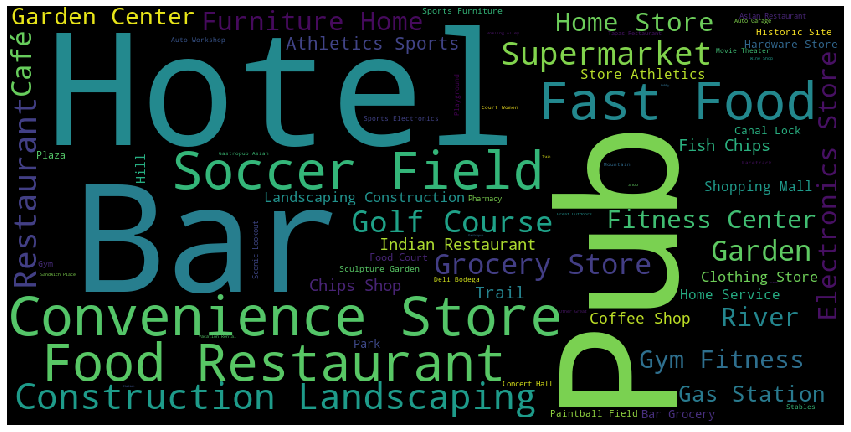

In [80]:
#!pip install wordcloud
from wordcloud import WordCloud

unique_string=(" ").join(dub_venues["Venue Category"]) #Obtaining venues seperated by space character
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string) #Creating a wordcloud object
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [38]:
print('There are {} uniques categories.'.format(len(dub_venues['Venue Category'].unique())))

There are 74 uniques categories.


In [62]:
print (nearby_venues['categories'].value_counts()[0:20])

Fast Food Restaurant    2
Hotel                   1
Supermarket             1
Auto Workshop           1
Name: categories, dtype: int64


### Preparing Data For clustering 

In [60]:
# one hot encoding
dub_onehot = pd.get_dummies(dub_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dub_onehot['Neighborhood'] = dub_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dub_onehot.columns[-1]] + list(dub_onehot.columns[:-1])
dub_onehot =dub_onehot[fixed_columns]

dub_onehot.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Bar,Boutique,Bowling Alley,Bus Stop,Business Service,Café,Canal Lock,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Deli / Bodega,Electronics Store,Farm,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Golf Course,Golf Driving Range,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,Hobby Shop,Home Service,Hotel,Indian Restaurant,Mountain,Movie Theater,Nightclub,Other Great Outdoors,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Racetrack,Restaurant,River,Rugby Pitch,Sandwich Place,Scenic Lookout,Sculpture Garden,Shopping Mall,Soccer Field,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Supermarket,Tapas Restaurant,Thai Restaurant,Trail,Train Station,Vacation Rental,Wine Shop,Women's Store
0,Rathrush,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Rathrush,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Rathrush,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Rathrush,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Rathrush,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
dub_grouped = dub_onehot.groupby('Neighborhood').mean().reset_index()
dub_grouped.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Bar,Boutique,Bowling Alley,Bus Stop,Business Service,Café,Canal Lock,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Deli / Bodega,Electronics Store,Farm,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Golf Course,Golf Driving Range,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,Hobby Shop,Home Service,Hotel,Indian Restaurant,Mountain,Movie Theater,Nightclub,Other Great Outdoors,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Racetrack,Restaurant,River,Rugby Pitch,Sandwich Place,Scenic Lookout,Sculpture Garden,Shopping Mall,Soccer Field,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Supermarket,Tapas Restaurant,Thai Restaurant,Trail,Train Station,Vacation Rental,Wine Shop,Women's Store
0,Agha,0.000000,0.0,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125000,0.000000,0.0,0.000000,0.000000,0.250,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.125,0.000000,0.0
1,Ballinacarrig,0.022222,0.0,0.022222,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.011111,0.0,0.033333,0.1,0.0,0.011111,0.077778,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.033333,0.011111,0.0,0.000000,0.022222,0.000,0.0,0.000000,0.022222,0.0,0.033333,0.011111,0.0,0.011111,0.0,0.055556,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022222,0.066667,0.0,0.055556,0.022222,0.000,0.0,0.0,0.0,0.066667,0.000000,0.0,0.011111,0.0,0.0,0.111111,0.011111,0.0,0.0,0.0,0.000,0.011111,0.0
2,Ballintemple,0.000000,0.0,0.000000,0.175,0.075,0.0,0.0,0.0,0.0,0.025000,0.000000,0.0,0.000000,0.0,0.0,0.225000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.075000,0.0,0.000000,0.000000,0.025,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.025000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.200000,0.0,0.000000,0.150000,0.025,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0
3,Ballon,0.000000,0.0,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.071429,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.178571,0.0,0.0,0.0,0.160714,0.0,0.0,0.0,0.000000,0.071429,0.0,0.196429,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.089286,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.017857,0.0,0.000000,0.035714,0.000,0.0,0.0,0.0,0.000000,0.178571,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0
4,Ballyellin,0.000000,0.0,0.000000,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.416667,0.000000,0.000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.000000,0.0


In [41]:
dub_grouped.shape

(50, 75)

### Analyzing the top 5 venues for each neighborhood and their occurrences.

In [42]:
num_top_venues = 5

for hood in dub_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dub_grouped[dub_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agha----
                    venue  freq
0            Home Service  0.50
1             Golf Course  0.25
2         Vacation Rental  0.12
3  Furniture / Home Store  0.12
4       Indian Restaurant  0.00


----Ballinacarrig----
                  venue  freq
0  Fast Food Restaurant  0.11
1           Supermarket  0.11
2           Coffee Shop  0.10
3     Convenience Store  0.08
4         Shopping Mall  0.07


----Ballintemple----
                        venue  freq
0  Construction & Landscaping  0.22
1                         Pub  0.20
2               Auto Workshop  0.18
3                       River  0.15
4                      Garden  0.08


----Ballon----
                  venue  freq
0           Gas Station  0.20
1          Soccer Field  0.18
2     Convenience Store  0.18
3  Fast Food Restaurant  0.16
4                 Hotel  0.09


----Ballyellin----
                        venue  freq
0                  Restaurant  0.42
1               Grocery Store  0.33
2  Construction & Landscap

In [43]:
#sorting venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
#Top  venues in each neigborhood
import numpy as np

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dub_grouped['Neighborhood']

for ind in np.arange(dub_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dub_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agha,Home Service,Golf Course,Vacation Rental,Furniture / Home Store,Women's Store
1,Ballinacarrig,Supermarket,Fast Food Restaurant,Coffee Shop,Convenience Store,Pub
2,Ballintemple,Construction & Landscaping,Pub,Auto Workshop,River,Bar
3,Ballon,Gas Station,Convenience Store,Soccer Field,Fast Food Restaurant,Hotel
4,Ballyellin,Restaurant,Grocery Store,Construction & Landscaping,Women's Store,Furniture / Home Store


### k-Means Clustering


Running the K-means clustering to decide the number of clusters to use

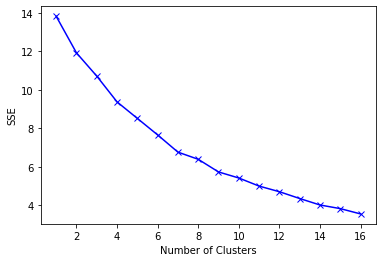

In [76]:
from matplotlib import pyplot as plt
data = dub_grouped.drop(['Neighborhood'],axis=1)
Sum_of_squared_distances = []
K = range(1,17)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [86]:
# set number of clusters
# import k-means from clustering stage
from sklearn.cluster import KMeans
kclusters = 8

dub_grouped_clustering = dub_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dub_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 2, 5, 7, 2, 1, 5, 2, 2, 5])

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [104]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(['Cluster Labels'],axis= 1)
dub_merged = Neighorhood_data

# merge dub_grouped with Neighorhood_data to add latitude/longitude for each neighborhood
dub_merged = dub_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

dub_merged.head() # check the last columns!

,County,Neighborhood,LATITUDE,LONGITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Carlow,Rathrush,52.730233,-6.798435,5.0,Hotel,Soccer Field,Convenience Store,Pub,Fast Food Restaurant
1,Carlow,Templepeter,52.762641,-6.848080,4.0,Golf Course,Furniture / Home Store,Athletics & Sports,Home Service,Women's Store
2,Carlow,Old Leighlin,52.729784,-7.015922,5.0,Gym / Fitness Center,Convenience Store,Hotel,Bar,Garden Center
3,Carlow,Clogrenan,52.795083,-6.983307,5.0,Trail,Clothing Store,River,Pub,Canal Lock
4,Carlow,Sliguff,52.659497,-6.946748,6.0,Restaurant,Women's Store,Farm,Fast Food Restaurant,Fish & Chips Shop


In [118]:
dub_merged = dub_merged.drop_duplicates(subset='Neighborhood')
dub_merged.shape

(52, 10)

In [119]:
#Distribution of neighborhoods in the 5 clusters
dub_merged[["Cluster Labels","Neighborhood"]].groupby("Cluster Labels").count().reset_index()

,Cluster Labels,Neighborhood
0,0.0,5
1,1.0,3
2,2.0,16
3,3.0,2
4,4.0,3
5,5.0,13
6,6.0,2
7,7.0,6


### Examinig clusters

### Cluster 1

In [120]:
dub_merged.loc[dub_merged['Cluster Labels'] == 0, dub_merged.columns[[1] + list(range(5,dub_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,Killerrig,Garden,Hotel,Soccer Field,Bus Stop,Women's Store
18,Kineagh,Hotel,Soccer Field,Garden,Women's Store,Garden Center
132,Grangeford,Hotel,Soccer Field,Pub,Garden,Farm
417,Rathvilly,Soccer Field,Garden Center,Stables,Café,Fast Food Restaurant
435,Rahill,Soccer Field,Garden Center,Stables,Café,Fast Food Restaurant


### Cluster 2

In [121]:
dub_merged.loc[dub_merged['Cluster Labels'] == 1, dub_merged.columns[[1] + list(range(5,dub_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
48,Ballymurphy,Construction & Landscaping,Women's Store,Garden Center,Fast Food Restaurant,Fish & Chips Shop
144,Kyle,Construction & Landscaping,Restaurant,Pub,Canal Lock,Furniture / Home Store
312,Coonogue,Construction & Landscaping,Women's Store,Garden Center,Fast Food Restaurant,Fish & Chips Shop


### Cluster 3

In [122]:
dub_merged.loc[dub_merged['Cluster Labels'] == 2, dub_merged.columns[[1] + list(range(5,dub_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Marley,Paintball Field,Restaurant,Canal Lock,Fast Food Restaurant,Playground
9,Burtonhall,Food Court,Golf Course,Women's Store,Park,Playground
11,Johnstown,Hill,Gym / Fitness Center,Fast Food Restaurant,Athletics & Sports,Auto Garage
20,Tullow Urban,Supermarket,Restaurant,Fast Food Restaurant,Grocery Store,Home Service
25,Hacketstown,Construction & Landscaping,Grocery Store,Bar,Pub,Indian Restaurant
26,Clonmore,Soccer Field,Construction & Landscaping,Fast Food Restaurant,Fish & Chips Shop,Grocery Store
31,Ballinacarrig,Supermarket,Fast Food Restaurant,Coffee Shop,Convenience Store,Pub
32,Graigue Urban,Supermarket,Fast Food Restaurant,Hotel,Convenience Store,Coffee Shop
34,Carlow Rural,Supermarket,Fast Food Restaurant,Convenience Store,Hotel,Park
75,Fennagh,Electronics Store,Athletics & Sports,Furniture / Home Store,Convenience Store,Pub


### Cluster 4

In [123]:
dub_merged.loc[dub_merged['Cluster Labels'] == 3, dub_merged.columns[[1] + list(range(5,dub_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
460,Williamstown,Sculpture Garden,Women's Store,Garden,Farm,Fast Food Restaurant
523,Haroldstown,Sculpture Garden,Soccer Field,Women's Store,Deli / Bodega,Farm


### Cluster 5

In [124]:
dub_merged.loc[dub_merged['Cluster Labels'] == 4, dub_merged.columns[[1] + list(range(5,dub_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Templepeter,Golf Course,Furniture / Home Store,Athletics & Sports,Home Service,Women's Store
44,Agha,Home Service,Golf Course,Vacation Rental,Furniture / Home Store,Women's Store
534,Ticknock,Golf Course,Women's Store,Garden Center,Fast Food Restaurant,Fish & Chips Shop


### Cluster 6

In [125]:
dub_merged.loc[dub_merged['Cluster Labels'] == 5, dub_merged.columns[[1] + list(range(5,dub_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Rathrush,Hotel,Soccer Field,Convenience Store,Pub,Fast Food Restaurant
2,Old Leighlin,Gym / Fitness Center,Convenience Store,Hotel,Bar,Garden Center
3,Clogrenan,Trail,Clothing Store,River,Pub,Canal Lock
5,Nurney,Pub,Gym,Home Service,River,Golf Course
22,Ballintemple,Construction & Landscaping,Pub,Auto Workshop,River,Bar
23,Cranemore,Bar,Pub,Hotel,Soccer Field,Golf Course
27,Garryhill,Convenience Store,Scenic Lookout,Electronics Store,Mountain,Women's Store
49,Borris,Historic Site,Pub,Hotel,Grocery Store,Pharmacy
55,Rathornan,Hotel,Garden Center,Pub,Bar,Clothing Store
65,Leighlinbridge,Bar,Hotel,Garden Center,Deli / Bodega,Gym / Fitness Center


### Cluster 7

In [126]:
dub_merged.loc[dub_merged['Cluster Labels'] == 6, dub_merged.columns[[1] + list(range(5,dub_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Sliguff,Restaurant,Women's Store,Farm,Fast Food Restaurant,Fish & Chips Shop
122,Corries,Concert Hall,Restaurant,Women's Store,Garden,Farm


### Cluster 8

In [127]:
dub_merged.loc[dub_merged['Cluster Labels'] == 7, dub_merged.columns[[1] + list(range(5,dub_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Kellistown,Plaza,Fast Food Restaurant,Convenience Store,Pub,Auto Garage
14,Shangarry,Café,Pub,Bar,Electronics Store,Gas Station
19,Ballon,Gas Station,Convenience Store,Soccer Field,Fast Food Restaurant,Hotel
21,Kilbride,Garden,Pub,Café,River,Bar
139,Tinnahinch,Fast Food Restaurant,Café,Bar,Playground,Paintball Field
176,Glynn,Café,Scenic Lookout,Women's Store,Fast Food Restaurant,Fish & Chips Shop


### Characterising Clusters

In [137]:
clustesr = dub_merged.join(dub_grouped.set_index('Neighborhood'), on='Neighborhood')
clustesr.head()

,County,Neighborhood,LATITUDE,LONGITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Bar,Boutique,Bowling Alley,Bus Stop,Business Service,Café,Canal Lock,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Deli / Bodega,Electronics Store,Farm,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Golf Course,Golf Driving Range,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,Hobby Shop,Home Service,Hotel,Indian Restaurant,Mountain,Movie Theater,Nightclub,Other Great Outdoors,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Racetrack,Restaurant,River,Rugby Pitch,Sandwich Place,Scenic Lookout,Sculpture Garden,Shopping Mall,Soccer Field,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Supermarket,Tapas Restaurant,Thai Restaurant,Trail,Train Station,Vacation Rental,Wine Shop,Women's Store
0,Carlow,Rathrush,52.730233,-6.798435,5.0,Hotel,Soccer Field,Convenience Store,Pub,Fast Food Restaurant,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.145833,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145833,0.0,0.0,0.041667,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Carlow,Templepeter,52.762641,-6.848080,4.0,Golf Course,Furniture / Home Store,Athletics & Sports,Home Service,Women's Store,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.307692,0.0,0.000000,0.000,0.0,0.538462,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Carlow,Old Leighlin,52.729784,-7.015922,5.0,Gym / Fitness Center,Convenience Store,Hotel,Bar,Garden Center,0.0,0.000000,0.0,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.244444,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.111111,0.000,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.177778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Carlow,Clogrenan,52.795083,-6.983307,5.0,Trail,Clothing Store,River,Pub,Canal Lock,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.212121,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.030303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.0,0.181818,0.0,0.0,0.030303,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.424242,0.0,0.0,0.0,0.0
4,Carlow,Sliguff,52.659497,-6.946748,6.0,Restaurant,Women's Store,Farm,Fast Food Restaurant,Fish & Chips Shop,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [138]:
#Obtaining the means (centres) per cluster
cluster_means=clustesr.drop(['County','LATITUDE','LONGITUDE'],axis=1).groupby("Cluster Labels",as_index=False).mean()
cluster_means

,Cluster Labels,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Bar,Boutique,Bowling Alley,Bus Stop,Business Service,Café,Canal Lock,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Deli / Bodega,Electronics Store,Farm,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Truck,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Golf Course,Golf Driving Range,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,Hobby Shop,Home Service,Hotel,Indian Restaurant,Mountain,Movie Theater,Nightclub,Other Great Outdoors,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Racetrack,Restaurant,River,Rugby Pitch,Sandwich Place,Scenic Lookout,Sculpture Garden,Shopping Mall,Soccer Field,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Supermarket,Tapas Restaurant,Thai Restaurant,Trail,Train Station,Vacation Rental,Wine Shop,Women's Store
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011111,0.000000,0.025833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106349,0.10250,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213997,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.054545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.395664,0.000000,0.000000,0.000000,0.09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044444,0.000000,0.000000,0.000000,0.000000,0.822222,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.0,0.004762,0.021791,0.006389,0.000000,0.083188,0.004808,0.002634,0.000000,0.000000,0.011719,0.013995,0.000508,0.004347,0.011887,0.000000,0.043871,0.028468,0.00000,0.023986,0.000508,0.070628,0.015217,0.015762,0.000000,0.019079,0.008280,0.00000,0.000000,0.004392,0.028639,0.00037,0.067909,0.001389,0.015321,0.006566,0.018886,0.000000,0.002588,0.018264,0.045669,0.012436,0.000000,0.004717,0.00037,0.003289,0.017241,0.010273,0.00037,0.007595,0.00074,0.009100,0.003889,0.030653,0.026042,0.080504,0.011257,0.000000,0.002634,0.000000,0.003289,0.009804,0.038844,0.001736,0.003328,0.005208,0.00,0.081599,0.003698,0.00074,0.000740,0.009868,0.006579,0.002958,0.008681
3,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000,0.166667,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4.0,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144231,0.000000,0.00000,0.000000,0.000000,0.596154,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.192308,0.000000,0.000000,0.000000,0.000000,0.0

In [139]:
print("{} venue categories".format(len(list(cluster_means.drop(columns="Cluster Labels")))))

74 venue categories


In [142]:
attributes_avg=list(cluster_means.drop(columns="Cluster Labels").mean()) #Overall means for each feature
features=list(cluster_means.drop(columns="Cluster Labels")) #List of all features used for clustering

characters_clust=[[],[],[],[],[],[],[],[]]

#Characterising the clusters with features having a cluster mean greater than the overall feature mean
for col in range(0,len(features)):
    for row in range(0,len(cluster_means)):
        if cluster_means.iloc[row,col]>attributes_avg[col]:
            characters_clust[row].append(features[col])

for label in range(0,len(cluster_means)):
    print("{} Characteristics of cluster {}: ".format(len(list(set(characters_clust[label]))),label+1),characters_clust[label])
    print(" ")

8 Characteristics of cluster 1:  ['Business Service', 'Canal Lock', 'Garden Center', 'Gas Station', 'Indian Restaurant', 'Racetrack', 'Sporting Goods Shop', 'Supermarket']
 
5 Characteristics of cluster 2:  ['Asian Restaurant', 'Chinese Restaurant', 'Convenience Store', 'Racetrack', 'River']
 
39 Characteristics of cluster 3:  ['Asian Restaurant', 'Auto Garage', 'Auto Workshop', 'Boutique', 'Bowling Alley', 'Bus Stop', 'Canal Lock', 'Chinese Restaurant', 'Coffee Shop', 'Convenience Store', 'Deli / Bodega', 'Farm', 'Fish & Chips Shop', 'Food Court', 'Food Truck', 'Golf Driving Range', 'Gym', 'Hardware Store', 'Hill', 'Historic Site', 'Indian Restaurant', 'Mountain', 'Nightclub', 'Park', 'Pet Store', 'Pizza Place', 'Plaza', 'Racetrack', 'River', 'Rugby Pitch', 'Shopping Mall', 'Sporting Goods Shop', 'Sports Bar', 'Sports Club', 'Tapas Restaurant', 'Thai Restaurant', 'Vacation Rental', 'Wine Shop', "Women's Store"]
 
3 Characteristics of cluster 4:  ['Asian Restaurant', 'Shopping Mall', '

In [144]:
for cluster in range(0,len(characters_clust)):
    features=characters_clust[cluster]
    Cluster_df=cluster_means[features].iloc[cluster,:].to_frame().transpose().sort_values(by=cluster,axis=1,ascending=False)
    print(" ")
    print("Most influential features in cluster {}: ".format(cluster+1),list(Cluster_df.columns.values)[0:9])

 
Most influential features in cluster 1:  ['Garden Center', 'Business Service', 'Canal Lock', 'Gas Station', 'Indian Restaurant', 'Racetrack', 'Sporting Goods Shop', 'Supermarket']
 
Most influential features in cluster 2:  ['Asian Restaurant', 'Chinese Restaurant', 'Convenience Store', 'Racetrack', 'River']
 
Most influential features in cluster 3:  ['Convenience Store', 'Racetrack', 'Hill', 'Food Court', 'Fish & Chips Shop', 'Canal Lock', 'Indian Restaurant', 'Coffee Shop', 'River']
 
Most influential features in cluster 4:  ['Asian Restaurant', 'Shopping Mall', 'Sporting Goods Shop']
 
Most influential features in cluster 5:  ['Asian Restaurant', 'Auto Garage', 'Garden', 'Golf Driving Range', 'Hotel', 'Wine Shop']
 
Most influential features in cluster 6:  ['Gym / Fitness Center', 'Electronics Store', 'Gym', 'Deli / Bodega', 'Gas Station', 'Farm', 'Rugby Pitch', 'Gastropub', 'Movie Theater']
 
Most influential features in cluster 7:  ['Asian Restaurant', 'Construction & Landscaping